## Importing libraries and datasets

In [9]:
!pip install jupyterthemes
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True, grid=False)

In [10]:
df_employee=pd.read_csv('Human_Resources.csv')
pd.set_option('max_columns', None)
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Applying info() to get insights on our dataframe

In [11]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Applying describe() to get statistical insights on our dataframe

In [12]:
df_employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [20]:
#Replacing 3 columns with 0 and 1
df_employee['Attrition']=df_employee['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
df_employee['OverTime']=df_employee['OverTime'].apply(lambda x:1 if x=='Yes' else 0)
df_employee['Over18']=df_employee['Over18'].apply(lambda x:1 if x=='Y' else 0)

In [21]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


## Visualize and explore dataset

<AxesSubplot:>

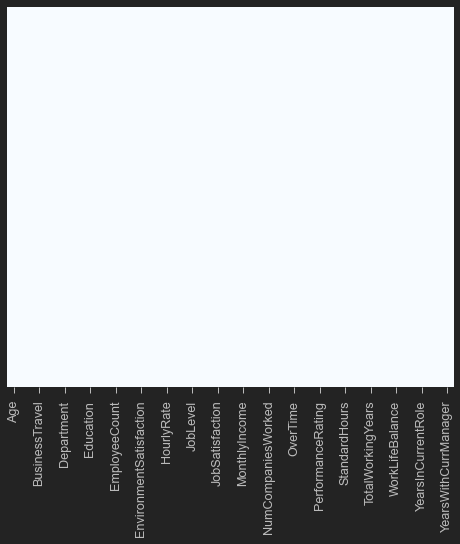

In [22]:
sns.heatmap(df_employee.isnull(),yticklabels=False, cbar=False, cmap='Blues')

#### Chequing for duplicates

In [23]:
df_employee.duplicated().sum()

0

### Plotting the histograms of features

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'Over18'}>,
        <AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
       

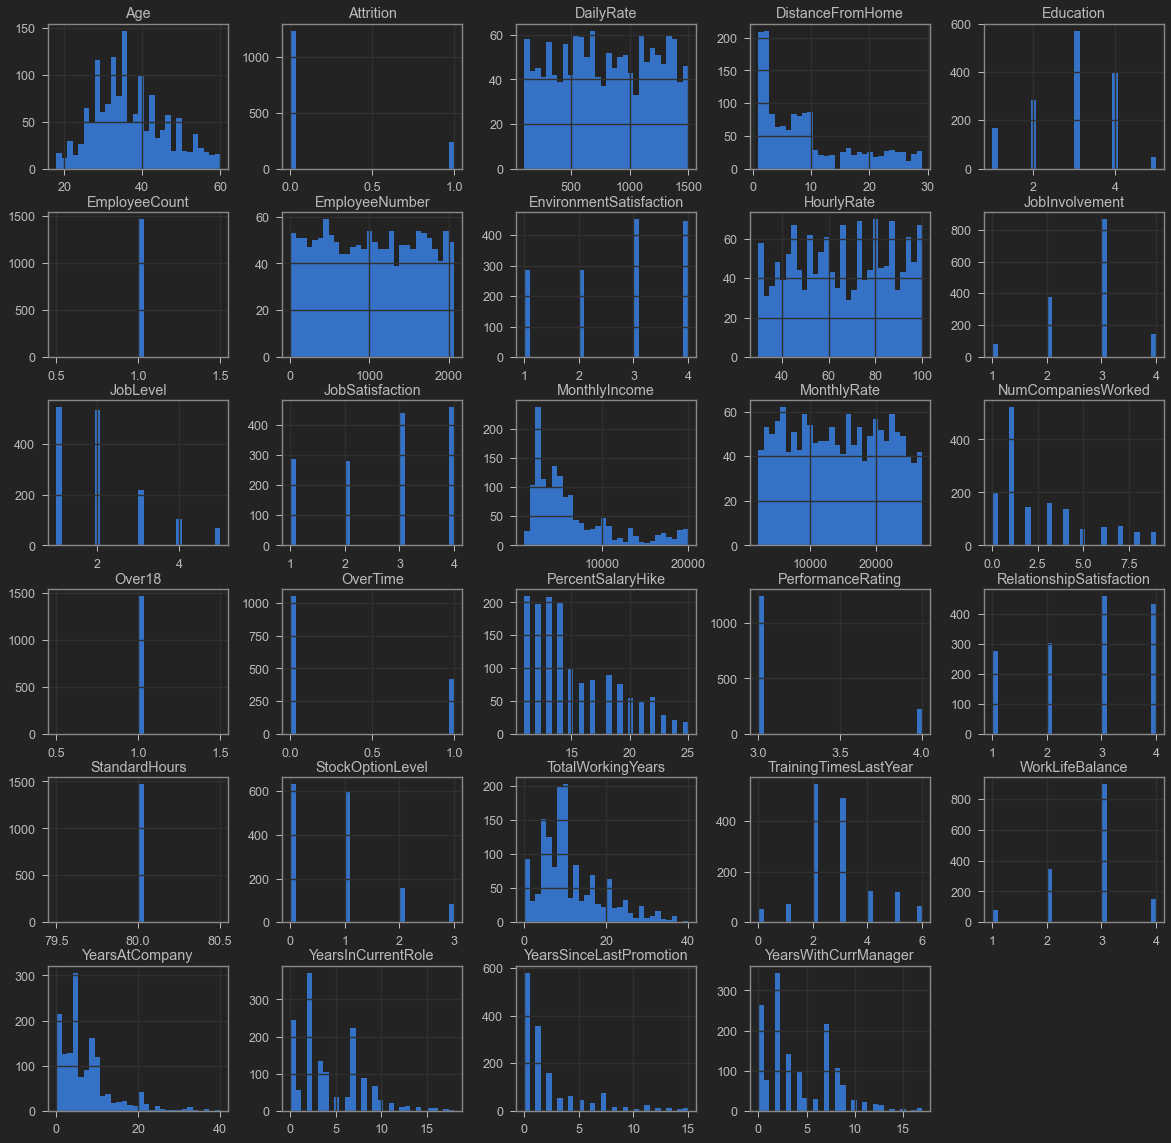

In [24]:
df_employee.hist(bins=30, figsize=(20,20), color='b')

#### Dropping features as they do not provide any valuable information

In [25]:
df_employee.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [26]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [27]:
df_left=df_employee[df_employee['Attrition']==1]
df_stayed=df_employee[df_employee['Attrition']==0]

In [28]:
len(df_left)

237

In [29]:
len(df_stayed)

1233

In [30]:
df_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [31]:
df_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Plotting the correlation matrix between features

<AxesSubplot:>

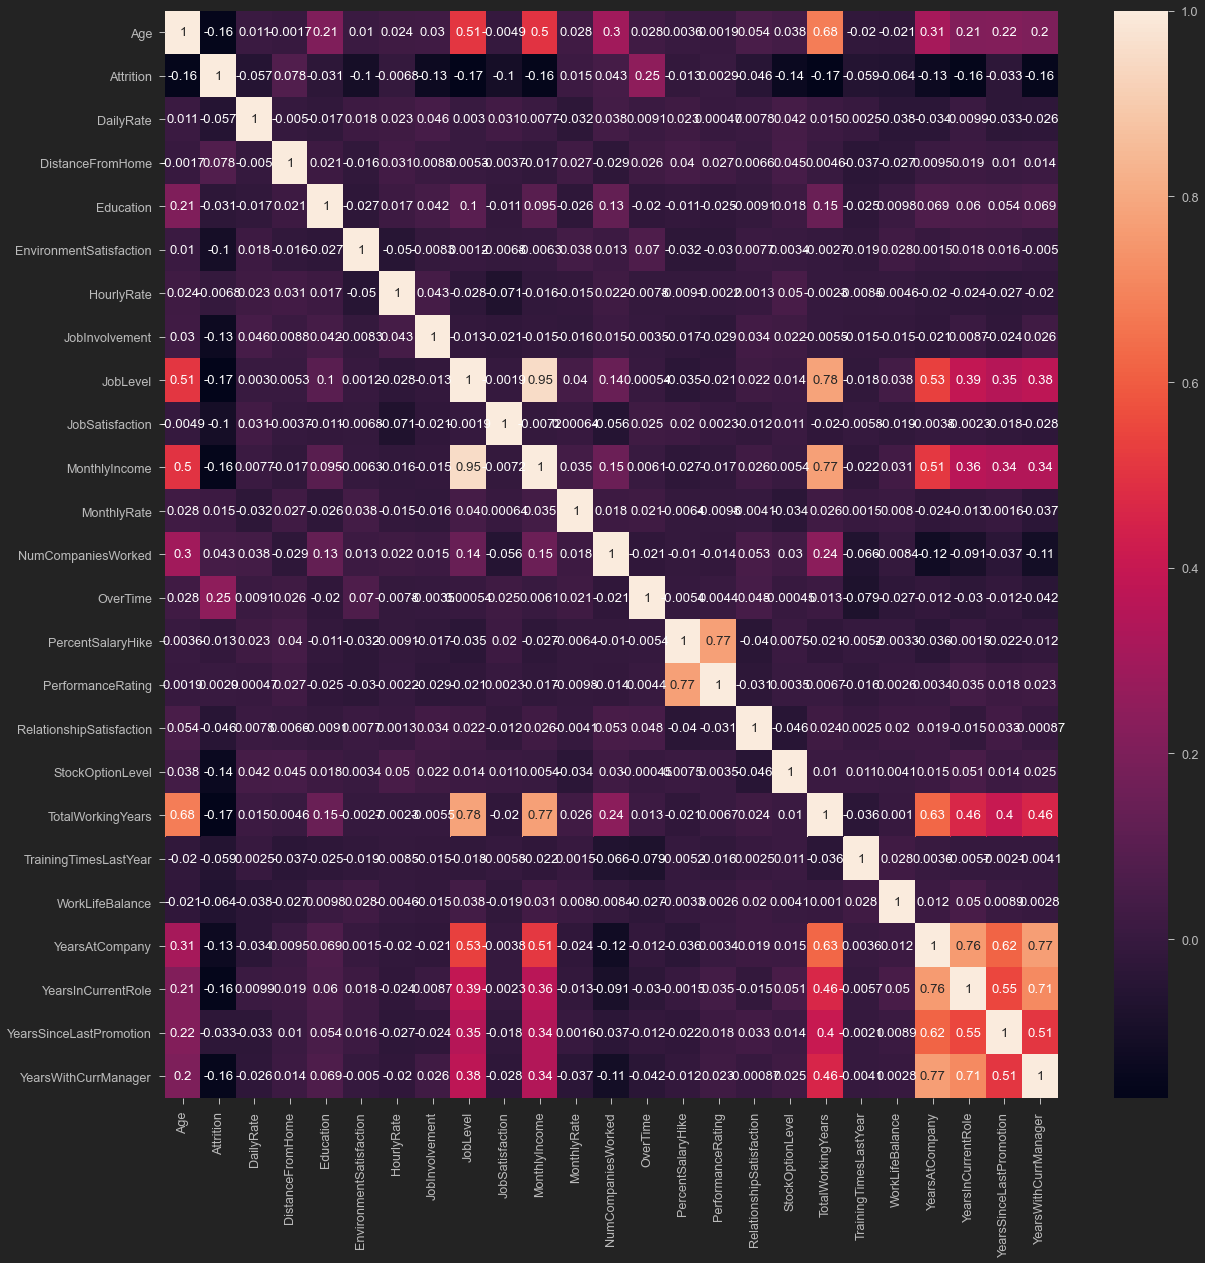

In [32]:
correlate=df_employee.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlate, annot=True)

### Plotting the "Attrition" feature

<AxesSubplot:xlabel='Age', ylabel='count'>

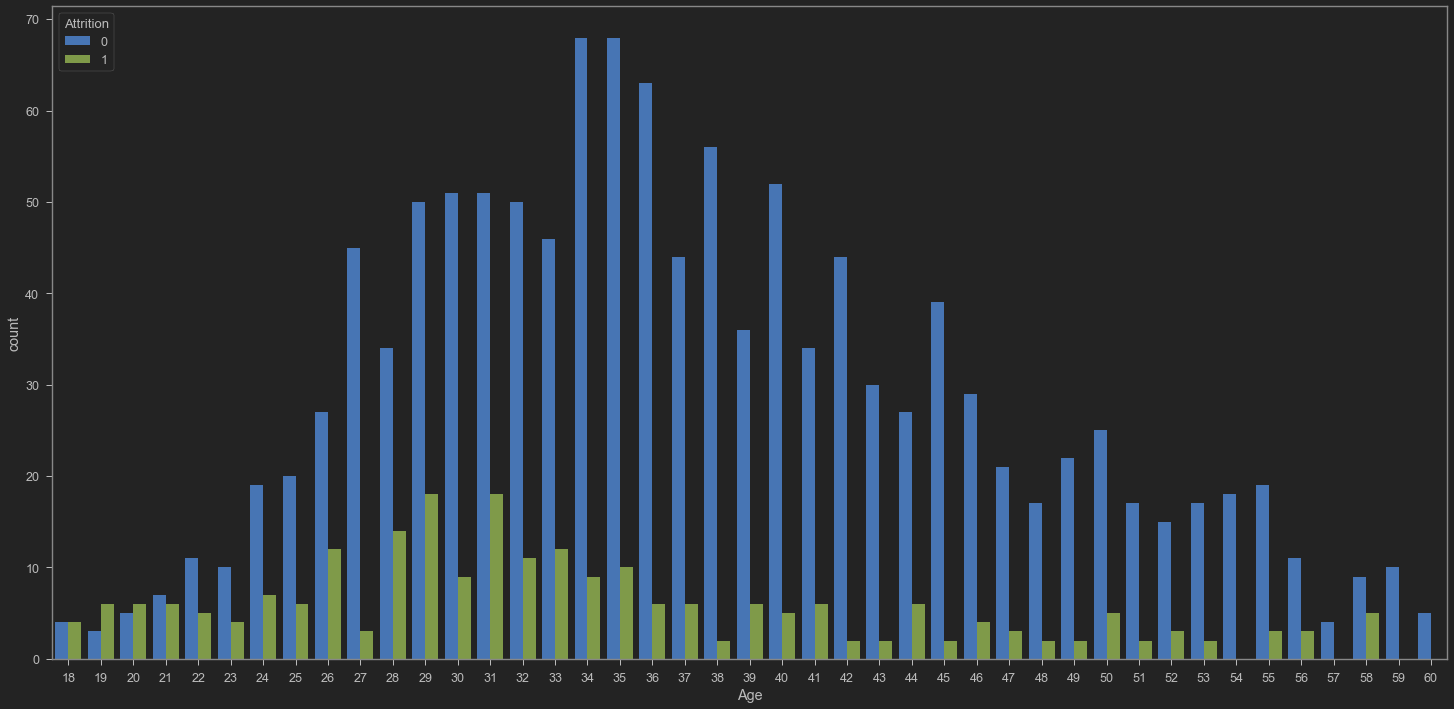

In [33]:
plt.figure(figsize=[25,12])
sns.countplot(x='Age', hue='Attrition', data=df_employee)

### Preparing the categorical features for Hot Encoding

In [34]:
X_categ=df_employee[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_categ

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [35]:
from sklearn.preprocessing import OneHotEncoder
onehotencoding=OneHotEncoder()
X_categ=onehotencoding.fit_transform(X_categ).toarray()

In [36]:
X_categ.shape

(1470, 26)

In [37]:
X_categ=pd.DataFrame(X_categ)

In [38]:
X_categ.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
X_numeric=df_employee[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
                       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' ]]

In [41]:
X_numeric.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [43]:
X_final=pd.concat([X_categ, X_numeric], axis=1)
X_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


# General approach:
# 1. Identifying the clusters and plotting PCA 1 and 2 for visualization purposes
# 2. Prediction models: Logistics Regression and Random Forest
# 3. Survival Analysis

## Developing general approach

## 1. Finding the optimal number of clusters using the "Elbow method"

### Scaling and transforming the data

In [44]:
scaler=StandardScaler()
X_final_scaled=scaler.fit_transform(X_final)

### The "Elbow Method"

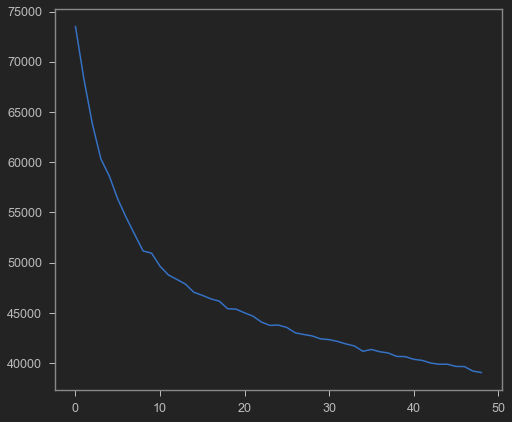

In [45]:
scores=[]
range_val=range(1,50)
for i in range_val:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_final_scaled)
    scores.append(kmeans.inertia_)
plt.plot(scores,'bx-')

### From the graph we will choose 10 clusters

### Applying K-means method

In [46]:
kmeans=KMeans(10)
kmeans.fit(X_final_scaled)
labels=kmeans.labels_

In [47]:
kmeans.cluster_centers_.shape

(10, 50)

In [50]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[X_final.columns])
cluster_centers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.089331,-0.098285,0.144226,-0.211604,0.727775,-0.659960,-0.136788,0.076701,-0.348255,0.262179,-0.025195,-0.095477,0.025516,-0.025516,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,4.168333,-0.497873,-0.533821,-0.244625,0.156414,0.034477,-0.176314,0.774856,-0.000089,-0.093165,0.207141,-0.202953,-0.104744,0.063358,1.727018,-0.025916,2.025053,0.107858,0.408185,0.010005,-0.070933,-0.148992,-0.022894,0.065888,1.301136,-0.018870,0.143402,0.641583,0.568278,0.310351,0.547214
1,-0.020318,-0.008960,0.021266,-0.211604,0.727775,-0.659960,-0.136788,0.087832,-0.348255,0.079810,0.010618,0.153086,-0.019574,0.019574,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.024334,-0.080316,0.107501,-0.294287,-0.005271,-0.022065,0.001424,0.003897,0.040239,0.095616,-0.778890,0.041181,-0.693309,-0.054247,-0.088338,0.109220,0.065353,0.038998,-0.006259,-0.023368,-0.458187,-0.104696,-0.117726,-0.309440,-0.263750,-0.211374,-0.256306
2,0.020044,0.021674,-0.032035,-0.211604,0.727775,-0.659960,-0.136788,0.095918,-0.348255,0.143281,0.127057,-0.057494,-0.146591,0.146591,-0.312785,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.024270,-0.019965,0.042971,-0.309593,-0.014547,0.026746,-0.137451,-0.003315,0.038983,-0.049136,-0.745157,-0.033971,-0.693905,-0.034719,-0.045671,-0.096816,-0.044604,0.023345,-0.023117,0.028945,-0.465821,0.116762,-0.060996,-0.324741,-0.283961,-0.238071,-0.231525
3,0.041173,0.025668,-0.049563,-0.211604,0.727775,-0.659960,-0.136788,0.092984,-0.348255,0.109227,0.056296,0.059724,-0.021815,0.021815,3.197088,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,0.089189,0.015707,-0.096315,0.315951,0.128334,0.073264,0.077593,0.045047,0.046674,0.004066,0.369917,0.052326,0.217967,0.012240,0.086178,-0.001222,0.065832,-0.002966,-0.016273,0.044828,0.358583,-0.039748,-0.083449,0.223022,0.174865,0.242667,0.125988
4,-0.012158,-0.062653,0.062075,-0.211604,-1.374051,1.515244,-0.136788,-0.837490,2.871460,-0.679141,-0.243059,-0.314093,0.070272,-0.070272,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,0.016974,0.018847,-0.035271,0.103484,-0.166959,0.161336,0.325231,-0.000418,0.074729,-0.000596,0.253322,-0.058629,0.110624,-0.005676,-0.015001,0.026837,-0.133439,-0.085363,-0.059864,0.126513,0.031498,-0.111405,0.071153,0.064247,0.129067,0.061307,0.121743
5,0.047783,-0.159111,0.105197,0.315694,-0.272123,0.142543,0.297039,-0.048544,0.089376,0.010203,-0.031541,-0.144294,0.114944,-0.114944,-0.312785,-0.191498,-0.462464,3.624001,-0.330808,-0.239904,-0.497873,-0.510451,-0.244625,0.002049,0.172347,-0.185942,1.089541,-0.050858,-0.141160,0.113498,0.050270,0.032109,0.065747,2.021597,-0.017990,2.262178,0.128801,0.142300,-0.046303,-0.025424,0.112096,0.095564,-0.065760,1.722781,-0.002485,0.008164,1.247840,0.622928,0.809715,0.607844
6,-0.040917,0.029573,0.001808,-0.211604,0.727775,-0.659960,-0.136788,0.157262,-0.348255,0.107302,-0.032708,0.023631,0.197085,-0.197085,-0.312785,-0.191498,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,0.062100,0.008522,-0.064482,0.150318,-0.016027,0.035814,-0.015993,0.178888,-0.043511,-0.066318,0.347319,-0.041555,0.168327,0.023310,0.028961,-0.031141,0.104841,0.090006,0.011003,0.023381,0.193699,-0.042280,0.006078,0.096635,0.205185,-0.021890,0.230366
7,0.102292,0.009418,-0.076318,-0.211604,-1.374051,1.515244,-0.136788,0.233319,-0.348255,-0.000808,0.035978,0.013292,-0.022122,0.022122,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.23990

### Aplying inverse trasnformation to understand the numbers

In [51]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[X_final.columns])
cluster_centers.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.075000,0.150000,0.775000,0.0,1.000000e+00,0.000000e+00,6.938894e-18,4.500000e-01,0.000000e+00,4.375000e-01,5.000000e-02,6.250000e-02,0.412500,0.587500,1.387779e-17,1.387779e-17,5.551115e-17,-1.387779e-17,0.000000e+00,1.000000e+00,-5.551115e-17,5.551115e-17,6.938894e-18,0.287500,0.475000,0.237500,44.000000,802.450000,8.437500,3.125000,2.500000,63.762500,2.775000,3.975000,2.700000,16033.550000,15080.550000,3.712500,0.287500,14.950000,3.100000,2.687500,0.850000,21.400000,2.775000,2.862500,10.937500,6.287500,3.187500,6.075000
1,0.095890,0.184932,0.719178,0.0,1.000000e+00,5.551115e-17,2.081668e-17,4.554795e-01,1.387779e-17,3.527397e-01,5.821918e-02,1.335616e-01,0.390411,0.609589,-1.526557e-16,2.775558e-17,-1.110223e-16,-5.551115e-17,-9.714451e-17,-1.040834e-16,1.000000e+00,5.551115e-17,-6.245005e-17,0.212329,0.417808,0.369863,34.236301,800.359589,9.013699,2.914384,2.726027,66.708904,2.797945,1.202055,2.773973,3239.972603,13927.113014,2.472603,0.332192,15.448630,3.167808,2.705479,0.773973,7.715753,2.664384,2.678082,5.113014,3.273973,1.506849,3.208904
2,0.108108,0.196911,0.694981,0.0,1.000000e+00,-5.551115e-17,2.081668e-17,4.594595e-01,-6.938894e-17,3.822394e-01,8.494208e-02,7.335907e-02,0.328185,0.671815,-1.387779e-16,2.775558e-17,1.000000e+00,-5.551115e-17,-8.326673e-17,-1.110223e-16,2.498002e-16,5.551115e-17,-6.245005e-17,0.212355,0.447876,0.339768,34.096525,796.617761,9.409266,2.772201,2.718147,66.683398,2.694981,1.239382,2.691120,3237.169884,14066.061776,2.579151,0.239382,15.046332,3.162162,2.687259,0.818533,7.656371,2.949807,2.718147,5.019305,3.200772,1.420849,3.297297
3,0.114504,0.198473,0.687023,0.0,1.000000e+00,2.220446e-16,1.387779e-17,4.580153e-01,5.551115e-17,3.664122e-01,6.870229e-02,1.068702e-01,0.389313,0.610687,1.000000e+00,1.387779e-17,5.551115e-17,0.000000e+00,4.163336e-17,-2.775558e-17,2.775558e-17,8.326673e-17,-6.938894e-18,0.259542,0.465649,0.274809,39.809160,854.251908,9.786260,2.992366,2.770992,66.839695,2.732824,2.473282,2.786260,7528.763359,14400.198473,2.908397,0.282443,15.450382,3.152672,2.694656,0.832061,14.068702,2.748092,2.702290,8.374046,4.862595,2.969466,4.572519
4,0.098361,0.163934,0.737705,0.0,-4.440892e-16,1.000000e+00,1.387779e-17,1.110223e-16,1.000000e+00,1.665335e-16,2.775558e-17,-1.387779e-17,0.434426,0.565574,0.000000e+00,6.938894e-18,-2.775558e-17,2.775558e-17,4.163336e-17,-4.163336e-17,2.775558e-17,1.000000e+00,-2.081668e-17,0.229508,0.467213,0.303279,37.868852,735.139344,10.500000,3.245902,2.721311,67.409836,2.729508,2.344262,2.663934,7023.565574,14272.713115,2.655738,0.295082,14.721311,3.122951,2.647541,0.901639,11.524590,2.655738,2.811475,7.401639,4.696721,2.385246,4.557377


### Cocatenating the clusters labels to our original DataFrame

In [52]:
df_cluster=pd.concat([X_final,pd.DataFrame({'Cluster':labels})], axis=1)
df_cluster.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,7
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,2
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,2


### Apply principal component analysis (PCA) and visualize the results

In [53]:
pca=PCA(n_components=12)
pca.fit(X_final_scaled)

PCA(n_components=12)

In [54]:
scores=pca.transform(X_final_scaled)

In [56]:
scores_df=pd.DataFrame(scores,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.023359,2.296679,-1.085827,2.001783,-1.523719,0.665757,0.231295,-0.684096,-2.042177,0.955363,1.211654,-1.125281
1,0.048183,-1.531828,-0.236263,-0.804202,2.331989,-1.721451,0.846223,2.610669,-1.314850,-1.063535,0.398476,0.916406
2,-2.919236,-0.999890,-0.174165,0.783983,-0.191933,2.452282,-0.274675,0.337930,0.647845,-0.201122,-0.848129,-0.755753
3,-1.185205,-1.061422,-0.654441,0.991582,0.251283,-2.140455,0.918028,-1.868483,-1.859497,-1.489666,1.535343,0.943131
4,-2.124220,-1.178107,0.500339,-1.140309,-0.775298,1.201425,-0.696849,-0.468438,1.595629,-1.650254,-1.299754,-1.702195


#### Explained variance

In [57]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.10704651, 0.07010837, 0.05272495, 0.04237772, 0.04117531,
       0.03922445, 0.03641632, 0.0355523 , 0.0321945 , 0.02988487,
       0.02678681, 0.02556436])

In [58]:
explained_variance=np.insert(explained_variance,0,0)

#### Preparing the cumulative variance data

In [59]:
cumulative_variance=np.cumsum(np.round(explained_variance,decimals=2))

#### Combining the dataframe

In [60]:
pc_df=pd.DataFrame(['','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'], columns=['PC'])
explained_variance_df=pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df=pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [61]:
df_explained_variance=pd.concat([pc_df,explained_variance_df,cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.00
1,PC1,0.107047,0.11
2,PC2,0.070108,0.18
3,PC3,0.052725,0.23
4,PC4,0.042378,0.27
5,PC5,0.041175,0.31
6,PC6,0.039224,0.35
7,PC7,0.036416,0.39
8,PC8,0.035552,0.43
9,PC9,0.032194,0.46


### Choosing PC1 and PC2 as the main principal components to show the visualization in a plane

In [62]:
pca_df=pd.DataFrame(data=scores_df,columns=['PC1','PC2'])
pca_df.head()    

,PC1,PC2
0,-0.023359,2.296679
1,0.048183,-1.531828
2,-2.919236,-0.999890
3,-1.185205,-1.061422
4,-2.124220,-1.178107


In [63]:
pca_df=pd.concat([pca_df,pd.DataFrame({'CLUSTER':labels})],axis=1)
pca_df.head()

,PC1,PC2,CLUSTER
0,-0.023359,2.296679,7
1,0.048183,-1.531828,1
2,-2.919236,-0.999890,2
3,-1.185205,-1.061422,1
4,-2.124220,-1.178107,2


<function matplotlib.pyplot.show(close=None, block=None)>

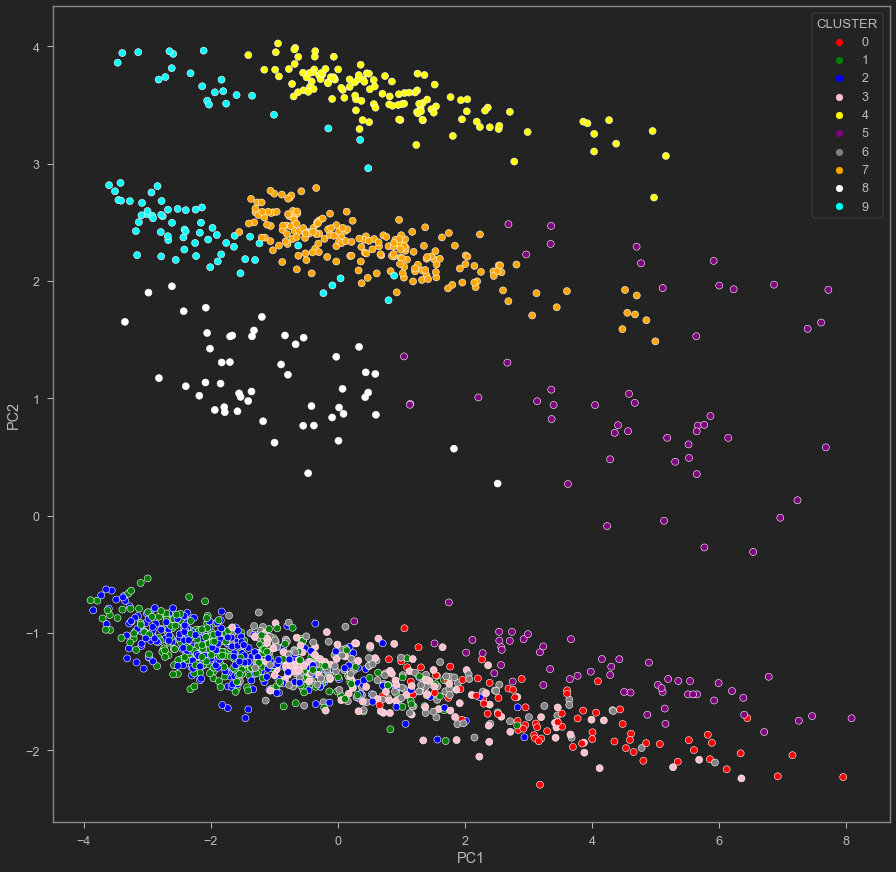

In [64]:
plt.figure(figsize=(15,15))
ax=sns.scatterplot(x="PC1",y="PC2",hue="CLUSTER", data=pca_df,palette=['red','green','blue','pink','yellow','purple','gray','orange', 'white', 'aqua'])
plt.show

## 2. PREDICTION MODELS

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_final)

In [66]:
y=df_employee['Attrition']

### LOGISTICS REGRESSION CLASSIFIER

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Logist = LogisticRegression()
Logist.fit(X_train, y_train)

y_pred = Logist.predict(X_test)

### Feature Importance

In [69]:
from sklearn.feature_selection import SelectFromModel

In [70]:
smf=SelectFromModel(Logist, threshold=-np.inf, max_features=10)
smf.fit(X_train, y_train)
feature_idx = smf.get_support()
feature_name = X_final.columns[feature_idx]
feature_name

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'WorkLifeBalance',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [71]:
from matplotlib import pyplot

Feature: 0, Score: -0.85374
Feature: 1, Score: 0.89594
Feature: 2, Score: -0.04232
Feature: 3, Score: -0.02941
Feature: 4, Score: -0.08268
Feature: 5, Score: 0.11197
Feature: 6, Score: 0.37988
Feature: 7, Score: -0.26213
Feature: 8, Score: -0.12926
Feature: 9, Score: -0.24239
Feature: 10, Score: -0.06690
Feature: 11, Score: 0.32068
Feature: 12, Score: -0.19976
Feature: 13, Score: 0.19964
Feature: 14, Score: -0.21176
Feature: 15, Score: 0.32692
Feature: 16, Score: 0.73411
Feature: 17, Score: -0.66367
Feature: 18, Score: -0.37770
Feature: 19, Score: -0.93356
Feature: 20, Score: 0.00017
Feature: 21, Score: 0.35638
Feature: 22, Score: 0.76899
Feature: 23, Score: -0.60528
Feature: 24, Score: -0.13687
Feature: 25, Score: 0.74203
Feature: 26, Score: -1.05678
Feature: 27, Score: -0.41603
Feature: 28, Score: 1.40906
Feature: 29, Score: 0.17116
Feature: 30, Score: -0.98136
Feature: 31, Score: 0.30778
Feature: 32, Score: -1.05614
Feature: 33, Score: -0.10162
Feature: 34, Score: -1.12286
Feature: 

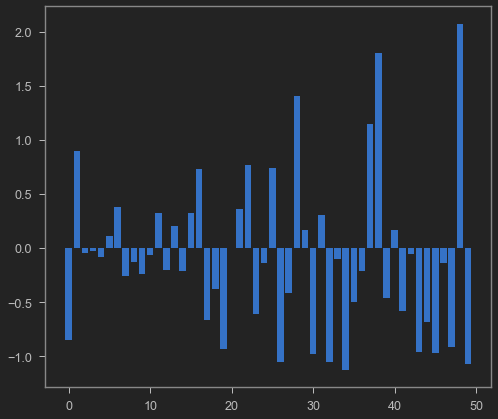

In [72]:
importance = Logist.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Performance

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 83.96739130434783 %


<AxesSubplot:>

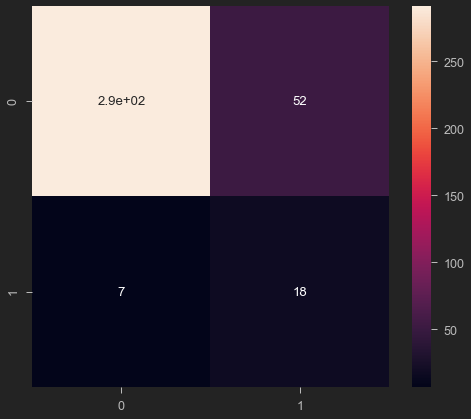

In [74]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       298
           1       0.72      0.26      0.38        70

    accuracy                           0.84       368
   macro avg       0.78      0.62      0.64       368
weighted avg       0.82      0.84      0.81       368



### Using SMOTE to balance minority class

In [76]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)

In [77]:
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

In [78]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 935, 1: 167})
After SMOTE: Counter({0: 935, 1: 935})


In [79]:
Logist.fit(X_train_smote, y_train_smote)
y_pred = Logist.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 74.72826086956522 %


<AxesSubplot:>

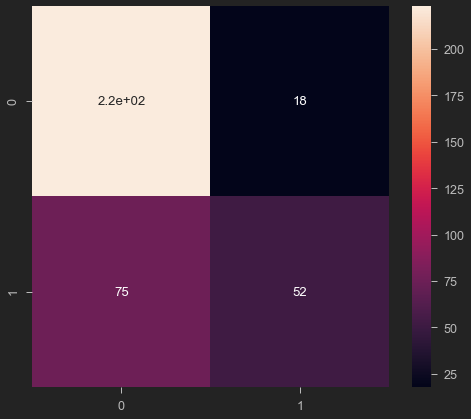

In [80]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       298
           1       0.41      0.74      0.53        70

    accuracy                           0.75       368
   macro avg       0.67      0.75      0.68       368
weighted avg       0.83      0.75      0.77       368



### RANDOM FOREST CLASSIFIER

In [82]:
from sklearn.ensemble import RandomForestClassifier

Forest = RandomForestClassifier()
Forest.fit(X_train, y_train)

RandomForestClassifier()

In [83]:
y_pred = Forest.predict(X_test)

### Feature Importance

Feature ranking:
1. feature 35 (0.068747)
2. feature 28 (0.057768)
3. feature 26 (0.056674)
4. feature 38 (0.054422)
5. feature 27 (0.051392)
6. feature 31 (0.049003)
7. feature 36 (0.046177)
8. feature 43 (0.044543)
9. feature 46 (0.039052)
10. feature 39 (0.034554)
11. feature 37 (0.033370)
12. feature 48 (0.031163)
13. feature 30 (0.030893)
14. feature 45 (0.026178)
15. feature 42 (0.025452)
16. feature 34 (0.025063)
17. feature 47 (0.024345)
18. feature 49 (0.023611)
19. feature 44 (0.023608)
20. feature 41 (0.022015)
21. feature 32 (0.021761)
22. feature 29 (0.019495)
23. feature 33 (0.018115)
24. feature 1 (0.017976)
25. feature 25 (0.015308)
26. feature 13 (0.009345)
27. feature 16 (0.009027)
28. feature 21 (0.008616)
29. feature 24 (0.008198)
30. feature 20 (0.008103)
31. feature 12 (0.007815)
32. feature 9 (0.007696)
33. feature 2 (0.007651)
34. feature 4 (0.007181)
35. feature 5 (0.006821)
36. feature 8 (0.006580)
37. feature 23 (0.006439)
38. feature 7 (0.006418)
39. feature

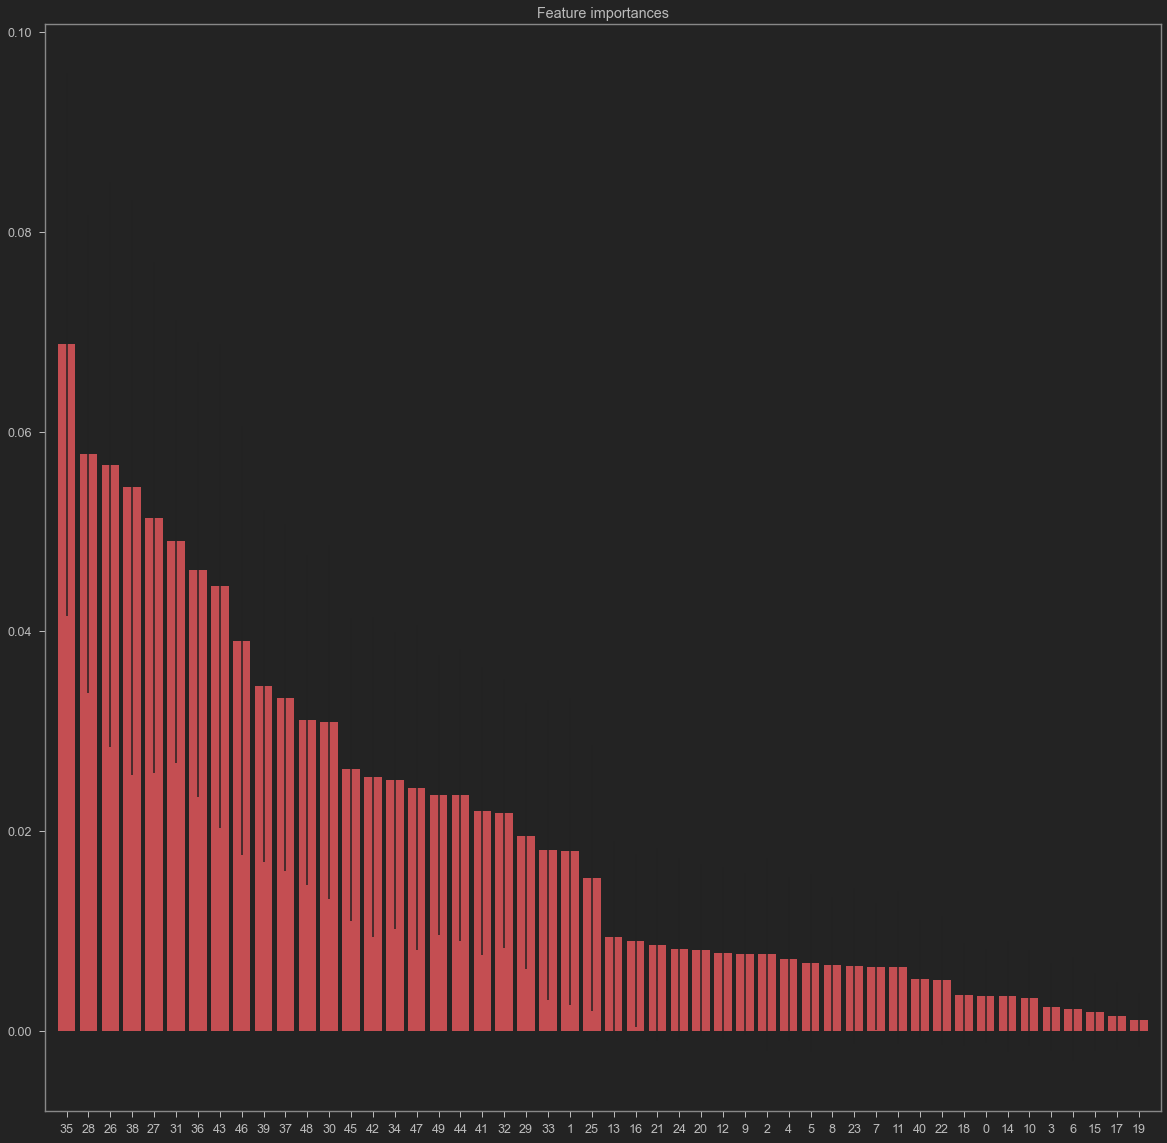

In [84]:
importances = Forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Performance

<AxesSubplot:>

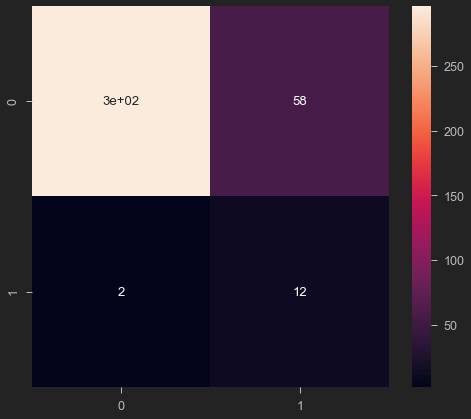

In [85]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       298
           1       0.86      0.17      0.29        70

    accuracy                           0.84       368
   macro avg       0.85      0.58      0.60       368
weighted avg       0.84      0.84      0.79       368



### Using SMOTE to balance minority class

In [87]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)

In [88]:
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

In [89]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 935, 1: 167})
After SMOTE: Counter({0: 935, 1: 935})


In [90]:
Forest.fit(X_train_smote, y_train_smote)
y_pred = Forest.predict(X_test)
print("Accuracy {} %".format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 84.78260869565217 %


<AxesSubplot:>

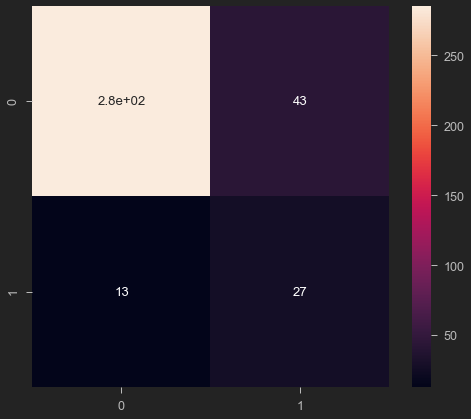

In [91]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       298
           1       0.68      0.39      0.49        70

    accuracy                           0.85       368
   macro avg       0.77      0.67      0.70       368
weighted avg       0.83      0.85      0.83       368



## 3. SURVIVAL ANALYSIS

### Using top 10 features from Random Forest feature importance

In [93]:
X_important=df_employee[['MonthlyIncome','TotalWorkingYears', 'Age', 'OverTime', 'DailyRate', 'HourlyRate', 'MonthlyRate', 
                    'DistanceFromHome', 'YearsAtCompany','YearsWithCurrManager']]

### Creating the DataFrame for Survival Analysis

In [95]:
df_survival=pd.concat([X_important, df_employee['Attrition'], pd.DataFrame({'Cluster':labels})],axis=1)
df_survival.head()

,MonthlyIncome,TotalWorkingYears,Age,OverTime,DailyRate,HourlyRate,MonthlyRate,DistanceFromHome,YearsAtCompany,YearsWithCurrManager,Attrition,Cluster
0,5993,8,41,1,1102,94,19479,1,6,5,1,7
1,5130,10,49,0,279,61,24907,8,10,7,0,1
2,2090,7,37,1,1373,92,2396,2,0,0,1,2
3,2909,8,33,1,1392,56,23159,3,8,0,0,1
4,3468,6,27,0,591,40,16632,2,2,2,0,2


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

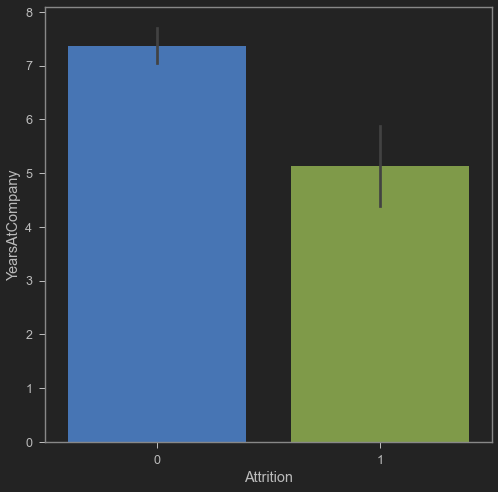

In [96]:
plt.figure(figsize=(8,8))
sns.barplot(data=df_survival, x=df_survival['Attrition'], y=df_survival['YearsAtCompany'])

### Using the Kaplan-Meier Model

In [97]:
from lifelines import KaplanMeierFitter, CoxPHFitter

In [98]:
kmf=KaplanMeierFitter()
kmf.fit(df_survival['YearsAtCompany'], df_survival['Attrition'], label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 1470 total observations, 1233 right-censored observations>

### The Kaplan-Meier estimator is a non-parametric estimator that allows us to use observed data to estimate the survival distribution. The curve plots the cumulative probability of survival beyond each given time period

<AxesSubplot:xlabel='timeline'>

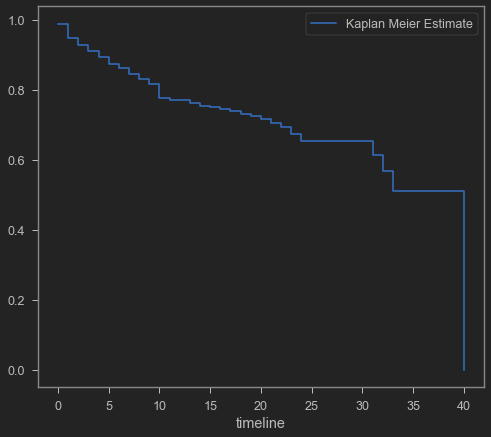

In [99]:
kmf.plot(ci_show=False)

### Plotting the Kaplan- Meier Curve per Cluster

In [100]:
clust=pd.DataFrame({'Cluster':labels})
clust_0=df_survival[df_survival['Cluster']==0]
clust_1=df_survival[df_survival['Cluster']==1]
clust_2=df_survival[df_survival['Cluster']==2]
clust_3=df_survival[df_survival['Cluster']==3]
clust_4=df_survival[df_survival['Cluster']==4]
clust_5=df_survival[df_survival['Cluster']==5]
clust_6=df_survival[df_survival['Cluster']==6]
clust_7=df_survival[df_survival['Cluster']==7]
clust_8=df_survival[df_survival['Cluster']==8]
clust_9=df_survival[df_survival['Cluster']==9]

### The survival function measures the probability that a cluster will survive past year "t". Using the Kaplan-Meier curve allows us to visually inspect differences in survival rates by cluster category

Text(0, 0.5, 'Survival probability')

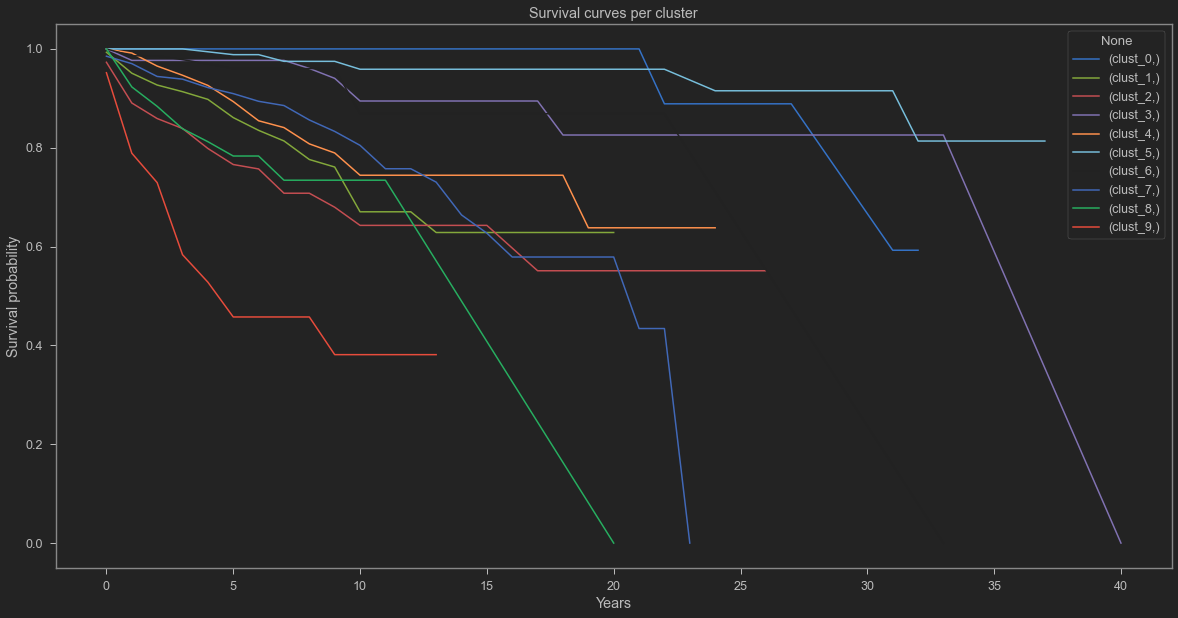

In [101]:
ax = plt.axes()
kmf.fit(clust_0['YearsAtCompany'], clust_0['Attrition'], label=['clust_0'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_1['YearsAtCompany'], clust_1['Attrition'], label=['clust_1'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_2['YearsAtCompany'], clust_2['Attrition'], label=['clust_2'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_3['YearsAtCompany'], clust_3['Attrition'], label=['clust_3'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_4['YearsAtCompany'], clust_4['Attrition'], label=['clust_4'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_5['YearsAtCompany'], clust_5['Attrition'], label=['clust_5'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_6['YearsAtCompany'], clust_6['Attrition'], label=['clust_6'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_7['YearsAtCompany'], clust_7['Attrition'], label=['clust_7'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_8['YearsAtCompany'], clust_8['Attrition'], label=['clust_8'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)
kmf.fit(clust_9['YearsAtCompany'], clust_9['Attrition'], label=['clust_9'])
kmf.survival_function_.plot(figsize=(20,10),ax=ax)

plt.title('Survival curves per cluster')
plt.xlabel('Years')
plt.ylabel('Survival probability')


### Using Cox Proportional Hazard Model

#### We can examine the confidence interval of different important features to assess its significance

In [102]:
cph = CoxPHFitter()

In [103]:
cph.fit(df_survival, duration_col='YearsAtCompany', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [104]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1333.97
         time fit was run = 2021-03-11 22:50:16 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
MonthlyIncome         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
TotalWorkingYears     -0.16       0.85       0.03            -0.22            -0.11                 0.81                 0.90
Age                   -0.01       0.99       0.01            -0.03             0.01                 0.97                 1.01
OverTime               1.08       2.96       0.13             0.83             1.34                 2.28                 3.83
DailyRate             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
HourlyRate             0.00       1.00       0.00            -0.01             0.01                 0.99                 1.01
MonthlyRate            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DistanceFromHome       0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
YearsWithCurrManager  -0.27       0.76       0.03            -0.32            -0.21                 0.72                 0.81
Cluster                0.08       1.08       0.02             0.03             0.12                 1.03                 1.13

                         z      p   -log2(p)
covariate                                   
MonthlyIncome        -3.43 <0.005      10.69
TotalWorkingYears    -5.74 <0.005      26.67
Age                  -1.18   0.24       2.08
OverTime              8.22 <0.005      52.07
DailyRate            -1.89   0.06       4.09
HourlyRate            0.32   0.75       0.42
MonthlyRate           0.40   0.69       0.54
DistanceFromHome      2.62   0.01       6.85
YearsWithCurrManager -9.49 <0.005      68.50
Cluster               3.35 <0.005      10.28
---
Concordance = 0.88
Partial AIC = 2687.93
log-likelihood ratio test = 480.31 on 10 df
-log2(p) of ll-ratio test = 319.40

### Based on p-values < 0.05 and below plot, we can see that the main significant features includes: AGE, TOTAL WORKING YEARS, MONTHLY INCOME and YEARS WITH CURRENT MANAGER.
### These features are the main drivers for employees to stay at the company

<AxesSubplot:xlabel='log(HR) (95% CI)'>

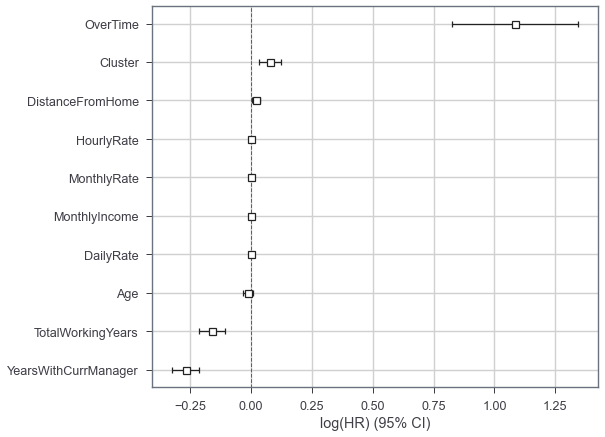

In [105]:
from jupyterthemes import jtplot
jtplot.style(theme='grade3',context='notebook',ticks=True, grid=True)
cph.plot()